# Time Series Wind Roses

When dealing with Air Quality Time Series, it is important to assess how distributions are affected by Wind Direction.

The Weather Toolbox provides a Wind object to ease such analysis.

## Introduction


### Imports

We import required packages:

In [1]:
import numpy as np
import pandas as pd
from odapi.connectors import Irceline
from odapi.toolbox import Wind
import matplotlib.pyplot as plt

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [3]:
data = pd.read_pickle("brussels_2012-2016.pickle").droplevel([1,2,3], axis=1)
client = Irceline()

## Roses and Boxplots

We will perform our analysis on the following series:

In [4]:
skeys = ['NO/41R001 (µg/m³)', 'PM-2.5/41N043 (µg/m³)', 'CO2/41R002 (ppm)',
          'O3/41R012 (µg/m³)', 'T/41R001 (°C)', 'WS/41R001 (m/s)']

skeys = [
    "BC/41R001 (µg/m³)",
    "CO/41R001 (mg/m³)",
    "NO/41R001 (µg/m³)",
    "NO2/41R001 (µg/m³)",
    "O3/41R001 (µg/m³)",
    "PM-10.0/41R001 (µg/m³)",
    "PM-2.5/41R001 (µg/m³)",
    "SO2/41R001 (µg/m³)",
    "T/41R001 (°C)",
    "WS/41R001 (m/s)"
]

In [5]:
SO2 = data.filter(regex="SO2").columns

In [6]:
q = (data.index >= "2014-09-19") & (data.index <= "2014-09-26")
q = data.index

In [7]:
data.loc[q]

seriekey,BC/41N043 (µg/m³),BC/41R001 (µg/m³),BC/41R002 (µg/m³),BC/41R012 (µg/m³),CO/41B004 (mg/m³),CO/41B006 (mg/m³),CO/41B008 (mg/m³),CO/41N043 (mg/m³),CO/41R001 (mg/m³),CO/41R002 (mg/m³),...,SO2/41R001 (µg/m³),SO2/41R002 (µg/m³),SO2/41R012 (µg/m³),T/41B011 (°C),T/41R001 (°C),T/41R012 (°C),WD/41R001 (°G),WD/41R012 (°G),WS/41R001 (m/s),WS/41R012 (m/s)
start,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 02:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 04:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00+01:00,3.805,1.915,2.695,0.865,0.275,NaN,NaN,0.290,0.305,0.285,...,2.0,2.5,2.0,NaN,8.65,6.90,182.0,174.0,2.945,4.610
2015-12-31 20:00:00+01:00,3.060,1.640,1.840,0.930,0.305,NaN,NaN,0.275,NaN,0.275,...,2.0,2.5,2.0,NaN,8.30,6.65,187.0,175.0,3.500,4.680
2015-12-31 21:00:00+01:00,2.580,1.085,1.375,0.515,0.270,NaN,NaN,0.265,NaN,0.200,...,2.0,2.0,2.0,NaN,8.45,7.10,194.0,184.0,4.080,5.445


In [8]:
scales = client.scales()
scales

{'BC': array([ 0, 10]),
 'CO2': array([350, 550]),
 'CO': array([0, 2]),
 'NO2': array([  0, 200]),
 'NO': array([  0, 200]),
 'O3': array([  0, 200]),
 'PM-10.0': array([  0, 150]),
 'PM-2.5': array([  0, 100]),
 'RH': array([  0, 100]),
 'SO2': array([ 0, 15]),
 'T': array([-15,  40]),
 'TOL': array([ 0, 25]),
 'p': array([ 950, 1150]),
 'WD': array([  0, 360]),
 'WS': array([ 0, 15]),
 'BZN': array([ 0, 10]),
 'EBZ': array([0, 5]),
 'MPX': array([0, 5]),
 'OXL': array([0, 5])}

In [9]:
scales["CO"][1] = 1
scales["BC"][1] = 5
scales["NO"][1] = 100
scales["PM-2.5"][1] = 40
scales["PM-10.0"][1] = 60
scales["CO2"][1] = 450
scales["O3"][1] = 100
scales["T"][1] = 30
scales["WS"][1] = 6

**Note:** There is a difference between Goniometric and Trigonometric systems. By defaults, Weather methods expect to get Goniometric angles (common meteorological reference) instead of Trigonometric angles.

BC/41R001 (µg/m³)
CO/41R001 (mg/m³)
NO/41R001 (µg/m³)
NO2/41R001 (µg/m³)
O3/41R001 (µg/m³)
PM-10.0/41R001 (µg/m³)
PM-2.5/41R001 (µg/m³)


/home/jlandercy/.local/lib/python3.6/site-packages/odapi-0.1.3-py3.6.egg/odapi/toolbox/weather.py:246: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axe = plt.subplots(figsize=figsize, subplot_kw={'projection': 'polar'})


SO2/41R001 (µg/m³)
T/41R001 (°C)
WS/41R001 (m/s)


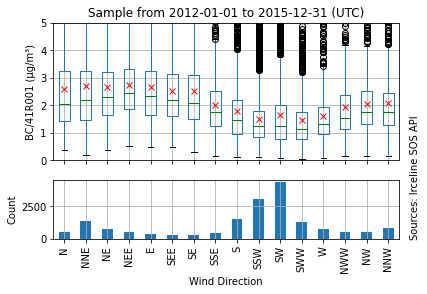

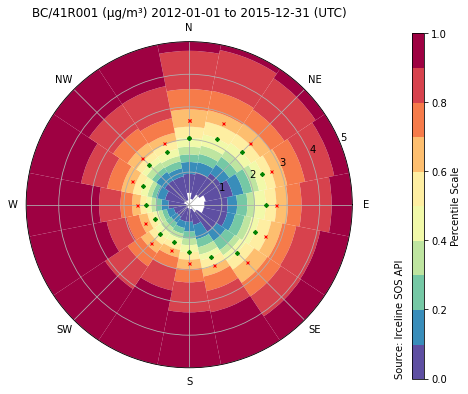

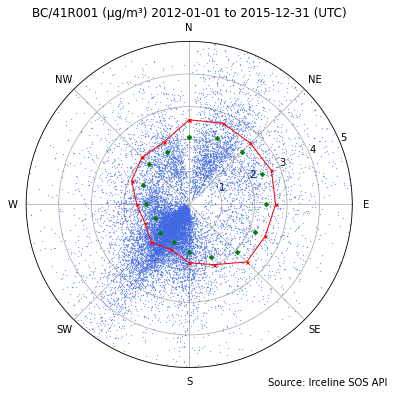

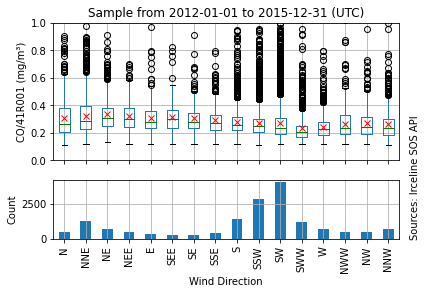

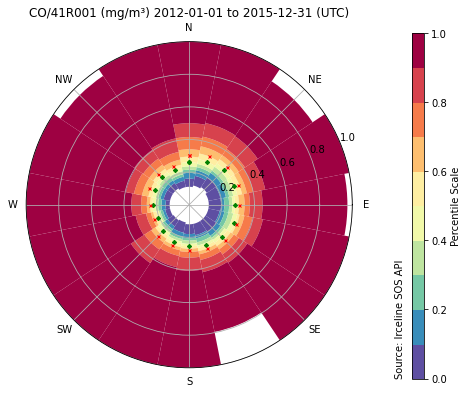

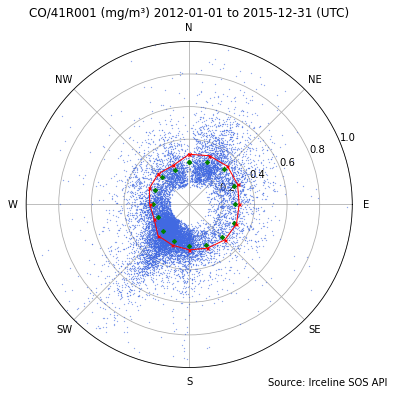

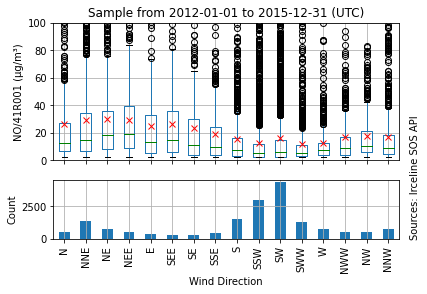

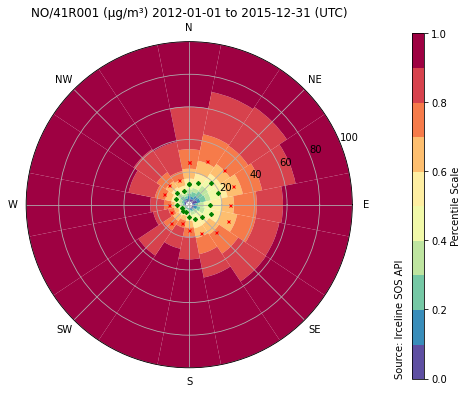

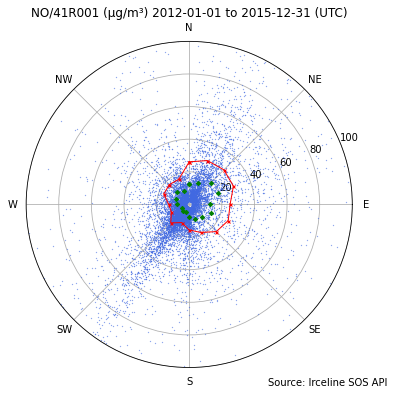

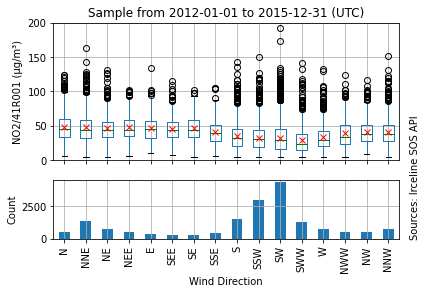

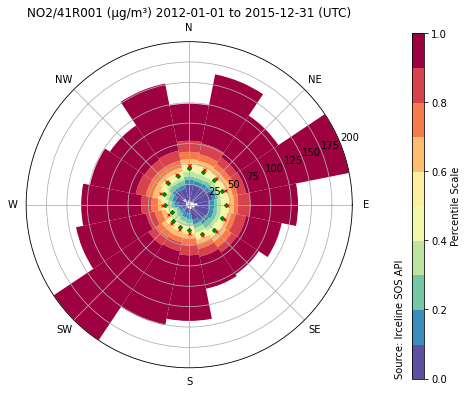

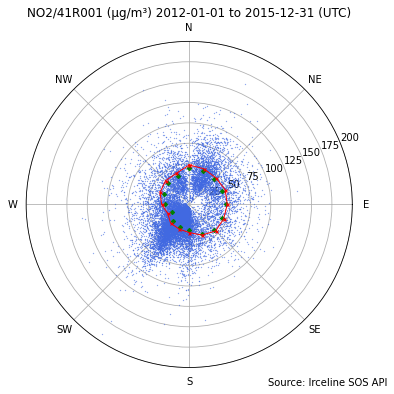

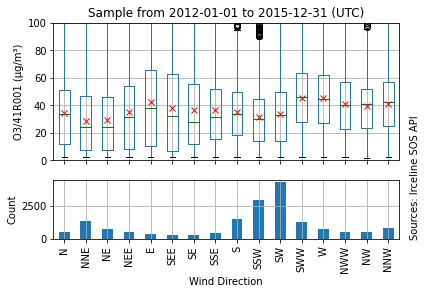

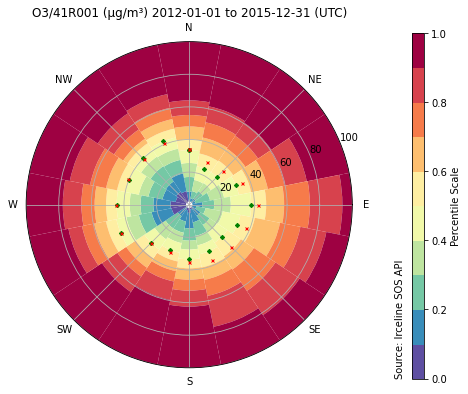

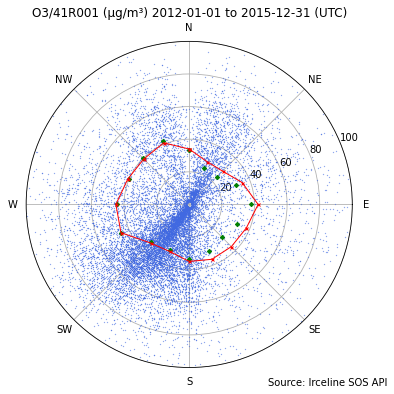

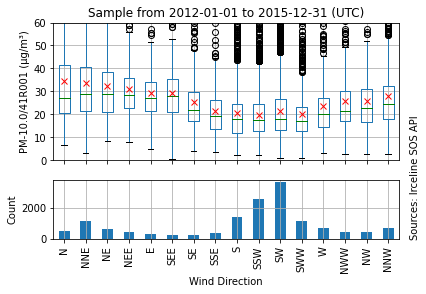

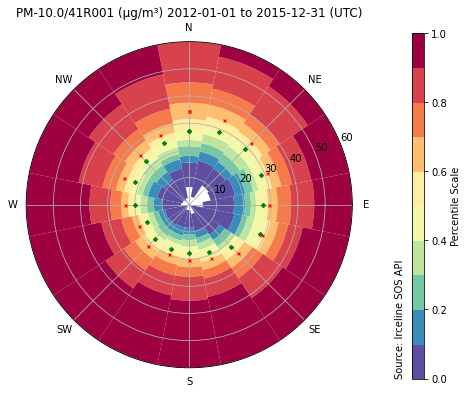

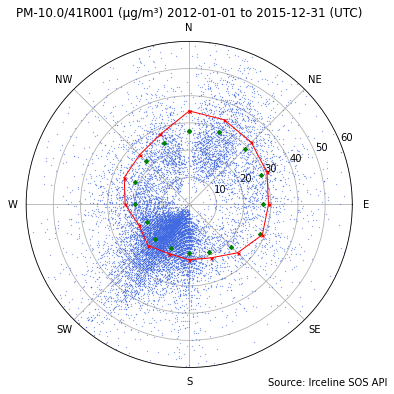

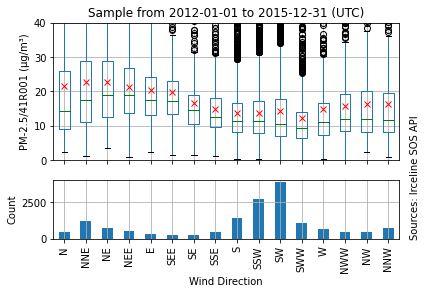

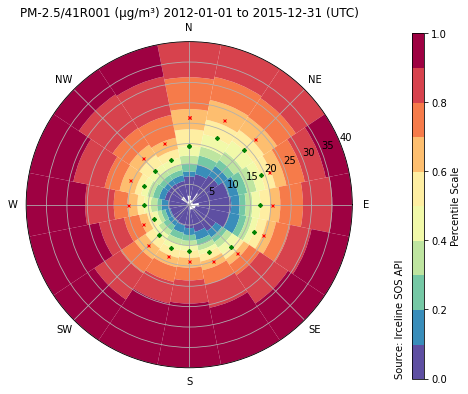

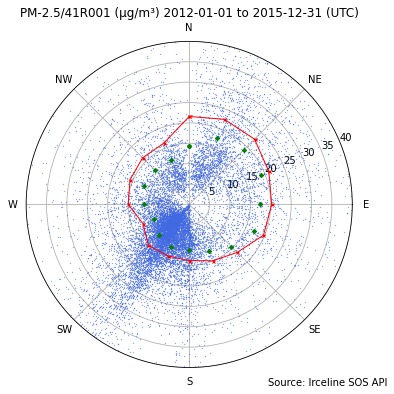

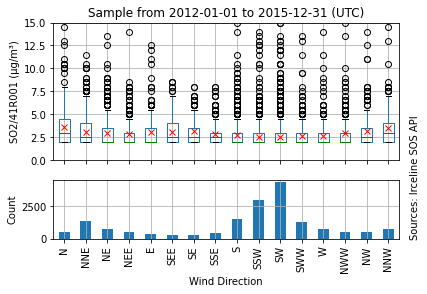

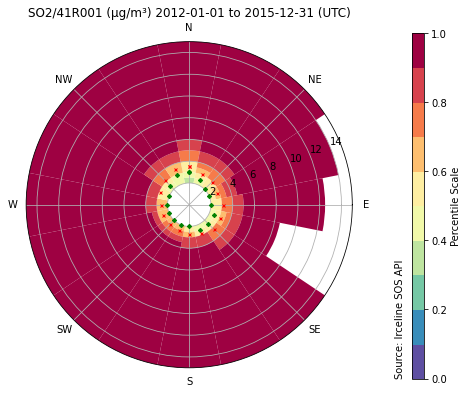

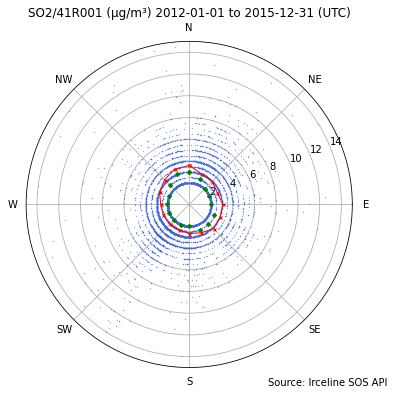

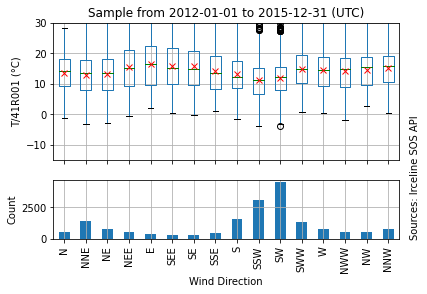

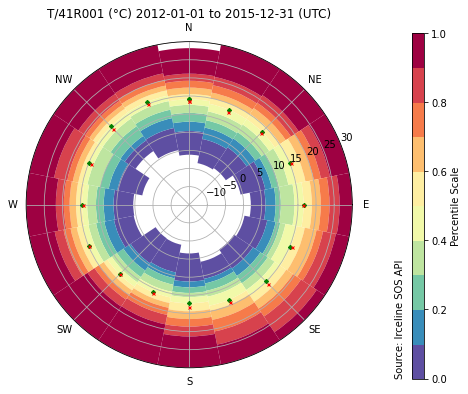

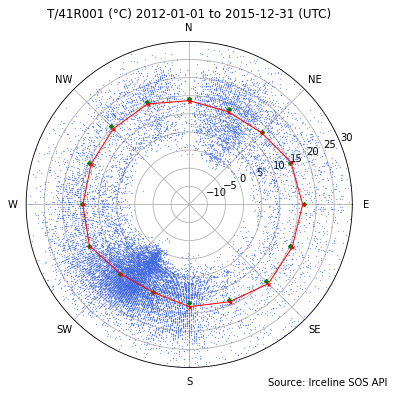

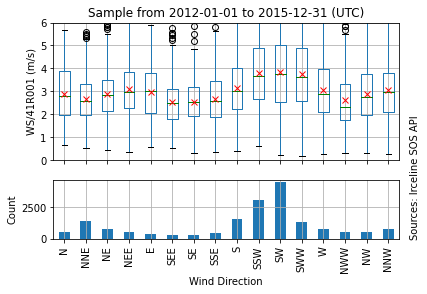

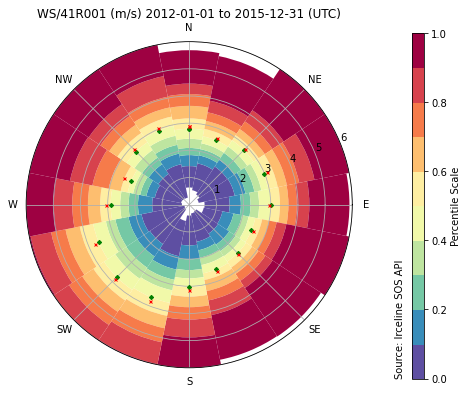

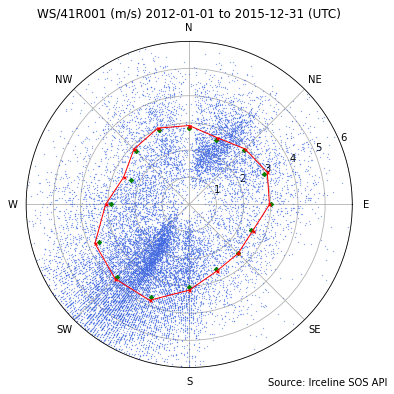

In [10]:
for k in skeys:
    print(k)
    axe1 = Wind.boxplot(data.loc[q], k, theta='WD/41R001 (°G)')
    axe1[0].set_ylim(scales[k.split('/')[0]])
    axe1[0].set_title("Sample from {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe1[0].figure.text(0.925, 0.155, "Sources: Irceline SOS API", rotation=90)
    axe2 = Wind.rose(data.loc[q], k, theta='WD/41R001 (°G)')
    axe2.set_ylim(scales[k.split('/')[0]])
    axe2.set_title(k + " {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe2.figure.text(0.87, 0.105, "Source: Irceline SOS API", rotation=90)
    axe3 = Wind.rose(data.loc[q], k, theta='WD/41R001 (°G)', quantiles=False, points=True, mean_linewidth=1.0)
    axe3.set_ylim(scales[k.split('/')[0]])
    axe3.set_title(k + " {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe3.figure.text(0.65, 0.085, "Source: Irceline SOS API", rotation=0)
    #break

In [11]:
from scipy import stats

In [12]:
k = "WS/41R001 (m/s)"

In [13]:
law = stats.exponweib(*stats.exponweib.fit(data[k].dropna()))

In [14]:
v = np.linspace(0, 15, 200)

In [15]:
kde = stats.gaussian_kde(data[k].dropna())

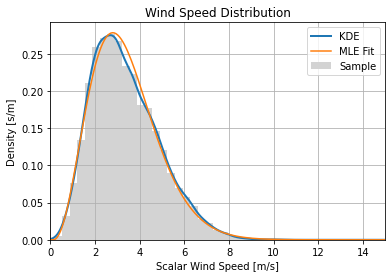

In [16]:
k = "WS/41R001 (m/s)"
axe = data[k].plot(kind="hist", density=1, color="lightgray", bins=30, label="Sample")
data[k].plot(kind="kde", linewidth=2, ax=axe, label="KDE")
axe.plot(v, law.pdf(v), label="MLE Fit")
#axe.plot(v, kde.pdf(v), label="KDE PDF")
axe.set_title("Wind Speed Distribution")
axe.set_xlabel("Scalar Wind Speed [m/s]")
axe.set_ylabel("Density [s/m]")
axe.set_xlim([0, 15])
axe.legend()
axe.grid()

In [17]:
x = data[k].dropna().values

In [18]:
stats.ks_1samp(x, law.cdf)

KstestResult(statistic=0.012184564811712928, pvalue=0.011033112693525023)

In [19]:
stats.ks_2samp(x, kde.pdf(np.linspace(0, 15, 20)))

KstestResult(statistic=0.9997712324849871, pvalue=3.0825993984136966e-73)

In [20]:
stats.ks_2samp(x, x)

KstestResult(statistic=0.0, pvalue=1.0)

In [21]:
c, b = np.histogram(x, 20)
ct = np.diff(law.cdf(b))*np.sum(c)
c2t = stats.chisquare(c, ct, ddof=2)

In [22]:
c2t

Power_divergenceResult(statistic=80.82175762616133, pvalue=2.7395697260952265e-10)

In [23]:
site = data.filter(regex="41R001")

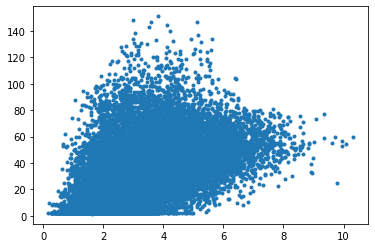

In [24]:
fig, axe = plt.subplots()
axe.plot(site.filter(regex="WS"), site.filter(regex="O3"), '.')

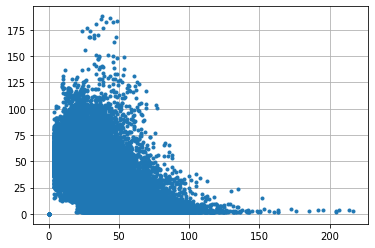

In [25]:
fig, axe = plt.subplots()
axe.plot(site.filter(regex="NO2"), site.filter(regex="O3"), '.')
axe.grid()
#axe.set_aspect("equal")

In [26]:
site.columns

Index(['BC/41R001 (µg/m³)', 'CO/41R001 (mg/m³)', 'NO/41R001 (µg/m³)',
       'NO2/41R001 (µg/m³)', 'O3/41R001 (µg/m³)', 'PM-10.0/41R001 (µg/m³)',
       'PM-2.5/41R001 (µg/m³)', 'SO2/41R001 (µg/m³)', 'T/41R001 (°C)',
       'WD/41R001 (°G)', 'WS/41R001 (m/s)'],
      dtype='object', name='seriekey')

In [27]:
import seaborn as sns
#sns.set_theme(style="ticks")

In [28]:
def tag(x):
    if (x.month >= 4) & (x.month < 10):
        return "Summer"
    else:
        return "Winter"

In [29]:
def dow(x):
    if x.dayofweek < 5:
        return "Weekday"
    else:
        return "Weekend"

In [30]:
def night(x):
    if (x.hour >= 7) & (x.hour < 19):
        return "Day"
    else:
        return "Night"

In [31]:
site["season"] = site.index.map(tag)
site["dow"] = site.index.map(dow)
site["day"] = site.index.map(night)
site["both"] = site["season"]+"/"+site["dow"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

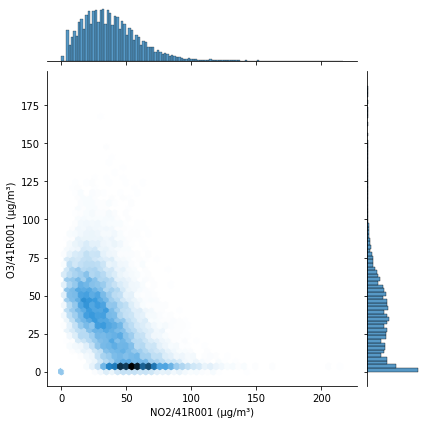

In [32]:
g = sns.jointplot(
    data=site,
    x="NO2/41R001 (µg/m³)", y="O3/41R001 (µg/m³)", #hue="season",
    kind="hex",
)

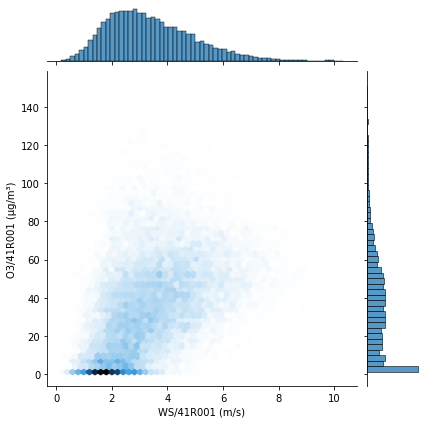

In [33]:
g = sns.jointplot(
    data=site,
    x="WS/41R001 (m/s)", y="O3/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

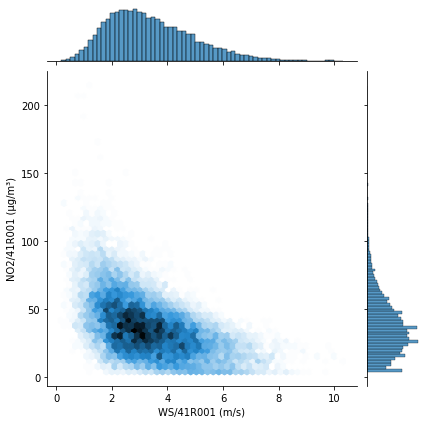

In [34]:
g = sns.jointplot(
    data=site,
    x="WS/41R001 (m/s)", y="NO2/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

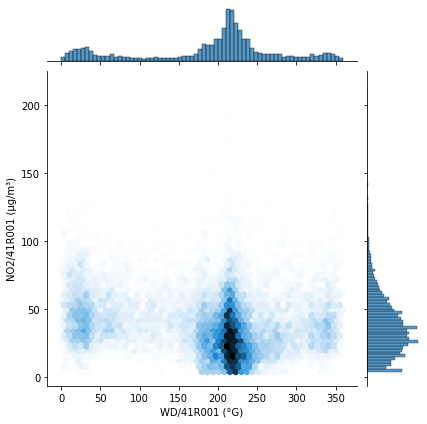

In [35]:
g = sns.jointplot(
    data=site,
    x="WD/41R001 (°G)", y="NO2/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

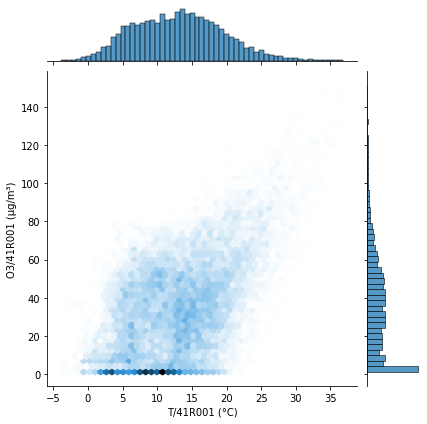

In [36]:
g = sns.jointplot(
    data=site,
    x="T/41R001 (°C)", y="O3/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

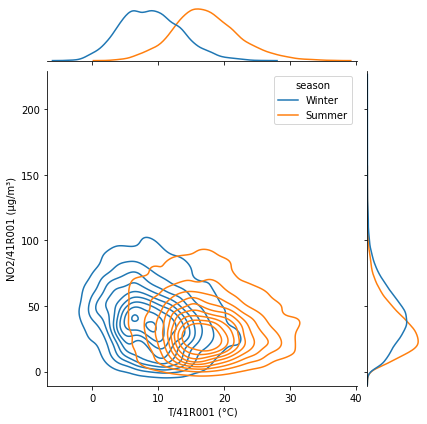

In [37]:
g = sns.jointplot(
    data=site,
    x="T/41R001 (°C)", y="NO2/41R001 (µg/m³)", hue="season",
    kind="kde",
)

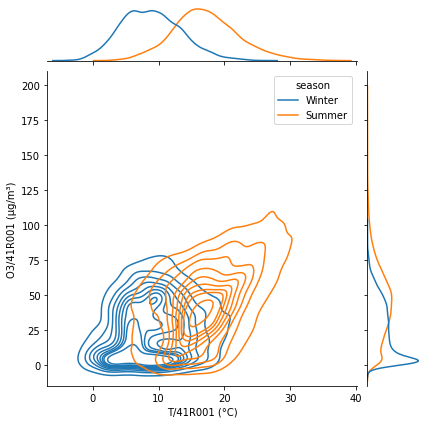

In [38]:
g = sns.jointplot(
    data=site,
    x="T/41R001 (°C)", y="O3/41R001 (µg/m³)", hue="season",
    kind="kde", #xlim=[-5,35], ylim=[0, 100]
)

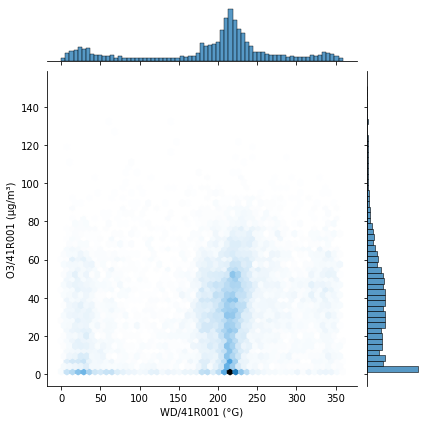

In [39]:
g = sns.jointplot(
    data=site,
    x="WD/41R001 (°G)", y="O3/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

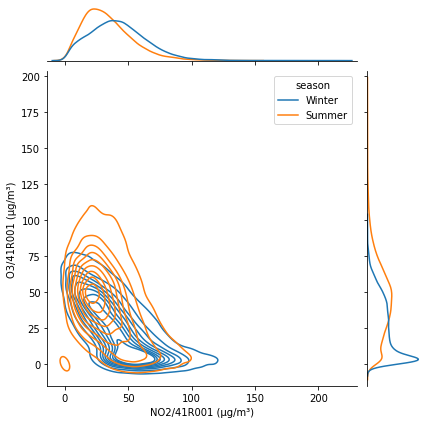

In [40]:
g = sns.jointplot(
    data=site,
    x="NO2/41R001 (µg/m³)", y="O3/41R001 (µg/m³)", hue="season",
    kind="kde",
)

In [41]:
from odapi.toolbox import Sun
sun = Sun()

In [42]:
site["day"] = site.index.floor('1D')
days = pd.Series(site["day"].unique())
solar = pd.DataFrame(days.apply(sun.solar_day).to_list(), index=days)
solar.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dawn,sunrise,noon,sunset,dusk
2013-12-31 00:00:00+01:00,2013-12-31 07:05:30.407981+00:00,2013-12-31 07:45:28.580726+00:00,2013-12-31 11:45:26+00:00,2013-12-31 15:46:02.226049+00:00,2013-12-31 16:26:00.977054+00:00
2015-07-02 00:00:00+02:00,2015-07-02 02:47:21.574682+00:00,2015-07-02 03:34:00.082425+00:00,2015-07-02 11:46:30+00:00,2015-07-02 19:58:51.351385+00:00,2015-07-02 20:45:22.156588+00:00
2014-03-17 00:00:00+01:00,2014-03-17 05:19:22.918039+00:00,2014-03-17 05:52:43.314156+00:00,2014-03-17 11:51:05+00:00,2014-03-17 17:50:07.385890+00:00,2014-03-17 18:23:34.605658+00:00
2015-10-15 00:00:00+02:00,2015-10-15 05:31:21.302454+00:00,2015-10-15 06:05:12.515300+00:00,2015-10-15 11:28:32+00:00,2015-10-15 16:50:50.608894+00:00,2015-10-15 17:24:37.276956+00:00
2014-04-12 00:00:00+02:00,2014-04-12 04:20:08.548246+00:00,2014-04-12 04:55:13.434908+00:00,2014-04-12 11:43:31+00:00,2014-04-12 18:32:36.780699+00:00,2014-04-12 19:07:52.684520+00:00


In [43]:
site = site.merge(solar, left_on="day", right_index=True)

In [44]:
site["start"] = site.index

In [45]:
site["start"] = site["start"].dt.tz_convert("UTC")

In [46]:
def night(x):
    if (x["dawn"] <= x["start"]) and (x["start"] < x["dusk"]):
        return "Day"
    else:
        return "Night"

In [47]:
site["night"] = site.apply(night, axis=1)

<AxesSubplot:xlabel='season,night'>

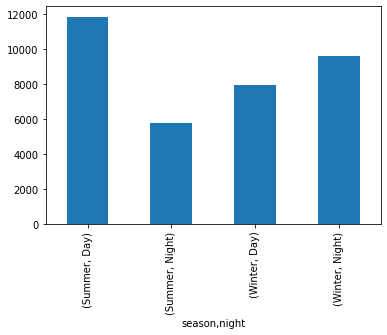

In [48]:
site.groupby(["season", "night"])["day"].count().plot(kind="bar")

In [49]:
site[["start", "day", "dawn", "dusk", "night"]].sample(20, random_state=1)

,start,day,dawn,dusk,night
start,,,,,
2013-04-07 01:00:00+02:00,2013-04-06 23:00:00+00:00,2013-04-07 00:00:00+02:00,2013-04-07 04:30:56.987638+00:00,2013-04-07 18:59:35.772252+00:00,Night
2015-01-19 05:00:00+01:00,2015-01-19 04:00:00+00:00,2015-01-19 00:00:00+01:00,2015-01-19 06:57:46.230358+00:00,2015-01-19 16:49:10.888837+00:00,Night
2013-03-02 19:00:00+01:00,2013-03-02 18:00:00+00:00,2013-03-02 00:00:00+01:00,2013-03-02 05:51:22.441538+00:00,2013-03-02 17:58:57.794898+00:00,Night
2015-10-19 08:00:00+02:00,2015-10-19 06:00:00+00:00,2015-10-19 00:00:00+02:00,2015-10-19 05:37:44.967924+00:00,2015-10-19 17:16:35.904840+00:00,Day
2013-03-12 04:00:00+01:00,2013-03-12 03:00:00+00:00,2013-03-12 00:00:00+01:00,2013-03-12 05:29:56.823822+00:00,2013-03-12 18:15:38.555335+00:00,Night
2013-06-19 17:00:00+02:00,2013-06-19 15:00:00+00:00,2013-06-19 00:00:00+02:00,2013-06-19 02:41:37.062837+00:00,2013-06-19 20:46:26.272608+00:00,Day
2012-04-08 10:00:00+02:00,2012-04-08 08:00:00+00:00,2012-04-08 00:00:00+02:00,2012-04-08 04:28:06.829256+00:00,2012-04-08 19:01:45.177873+00:00,Day
2014-04-10 09:00:00+02:00,2014-04-10 07:00:00+00:00,2014-04-10 00:00:00+02:00,2014-04-10 04:24:40.442952+00:00,2014-04-10 19:04:23.033811+00:00,Day
2015-07-13 10:00:00+02:00,2015-07-13 08:00:00+00:00,2015-07-13 00:00:00+02:00,2015-07-13 02:58:59.391545+00:00,2015-07-13 20:36:48.557921+00:00,Day


<AxesSubplot:>

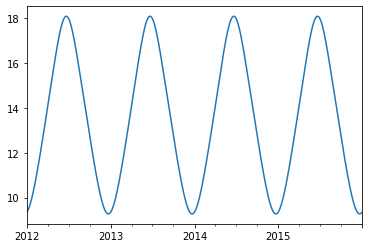

In [50]:
((solar["dusk"] - solar["dawn"]).dt.total_seconds()/3600).plot()

In [51]:
site["tag"] = site["season"]+"/"+site["night"]

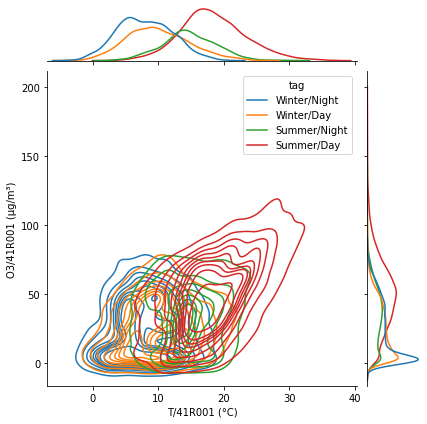

In [52]:
g = sns.jointplot(
    data=site,
    x="T/41R001 (°C)", y="O3/41R001 (µg/m³)", hue="tag",
    kind="kde",
)

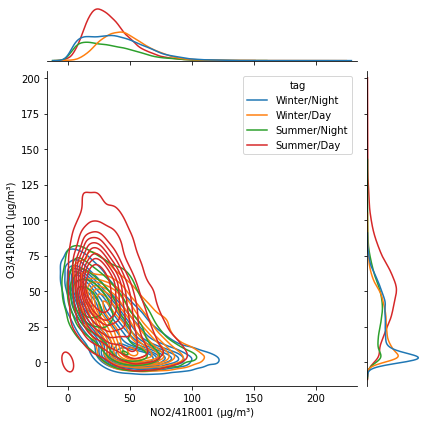

In [53]:
g = sns.jointplot(
    data=site,
    x="NO2/41R001 (µg/m³)", y="O3/41R001 (µg/m³)", hue="tag",
    kind="kde",
)